import requests
import json

# Base URL
base_url = 'http://127.0.0.1:5001'

print("=" * 80)
print("ТЕСТ 1: Получение текущих параметров конфигурации")
print("=" * 80)

# GET current config
get_url = f'{base_url}/config/alert_parameters'
try:
    response = requests.get(get_url)
    print(f"\nStatus Code: {response.status_code}")
    
    if response.status_code == 200:
        data = response.json()
        print("\nТекущие параметры:")
        print(json.dumps(data, indent=2, ensure_ascii=False))
    else:
        print(f"Error: {response.text}")
except requests.exceptions.ConnectionError:
    print("Connection Error: Flask server is not running. Please start it with 'python backend/app.py'")

print("\n" + "=" * 80)
print("ТЕСТ 2: Изменение параметров (оба параметра)")
print("=" * 80)

# PUT - update both parameters
put_url = f'{base_url}/config/alert_parameters'
new_config = {
    "pump_cavitation_multiplier": 1.8,
    "small_leakage_excedents_threshold": 2.5
}

try:
    response = requests.put(put_url, json=new_config, headers={'Content-Type': 'application/json'})
    print(f"\nStatus Code: {response.status_code}")
    
    if response.status_code == 200:
        data = response.json()
        print("\nОтвет сервера:")
        print(json.dumps(data, indent=2, ensure_ascii=False))
    else:
        print(f"Error: {response.text}")
except requests.exceptions.ConnectionError:
    print("Connection Error: Flask server is not running.")

print("\n" + "=" * 80)
print("ТЕСТ 3: Проверка обновленных значений")
print("=" * 80)

# GET again to verify
try:
    response = requests.get(get_url)
    print(f"\nStatus Code: {response.status_code}")
    
    if response.status_code == 200:
        data = response.json()
        print("\nОбновленные параметры:")
        print(json.dumps(data, indent=2, ensure_ascii=False))
    else:
        print(f"Error: {response.text}")
except requests.exceptions.ConnectionError:
    print("Connection Error: Flask server is not running.")

print("\n" + "=" * 80)
print("ТЕСТ 4: Изменение только одного параметра")
print("=" * 80)

# PUT - update only one parameter
single_param = {
    "pump_cavitation_multiplier": 1.5
}

try:
    response = requests.put(put_url, json=single_param, headers={'Content-Type': 'application/json'})
    print(f"\nStatus Code: {response.status_code}")
    
    if response.status_code == 200:
        data = response.json()
        print("\nОтвет сервера:")
        print(json.dumps(data, indent=2, ensure_ascii=False))
    else:
        print(f"Error: {response.text}")
except requests.exceptions.ConnectionError:
    print("Connection Error: Flask server is not running.")

print("\n" + "=" * 80)
print("ТЕСТ 5: Валидация - неправильное значение (вне диапазона)")
print("=" * 80)

# PUT - invalid value (out of range)
invalid_config = {
    "pump_cavitation_multiplier": 3.0  # Should fail - max is 2.0
}

try:
    response = requests.put(put_url, json=invalid_config, headers={'Content-Type': 'application/json'})
    print(f"\nStatus Code: {response.status_code}")
    
    if response.status_code == 400:
        print("\n✓ Валидация работает! Получена ошибка:")
        data = response.json()
        print(json.dumps(data, indent=2, ensure_ascii=False))
    else:
        print(f"Unexpected response: {response.text}")
except requests.exceptions.ConnectionError:
    print("Connection Error: Flask server is not running.")

print("\n" + "=" * 80)
print("ТЕСТ 6: Восстановление значений по умолчанию")
print("=" * 80)

# PUT - restore defaults
default_config = {
    "pump_cavitation_multiplier": 1.5,
    "small_leakage_excedents_threshold": 0.3
}

try:
    response = requests.put(put_url, json=default_config, headers={'Content-Type': 'application/json'})
    print(f"\nStatus Code: {response.status_code}")
    
    if response.status_code == 200:
        data = response.json()
        print("\nЗначения по умолчанию восстановлены:")
        print(json.dumps(data, indent=2, ensure_ascii=False))
    else:
        print(f"Error: {response.text}")
except requests.exceptions.ConnectionError:
    print("Connection Error: Flask server is not running.")

print("\n" + "=" * 80)
print("Тестирование завершено!")
print("=" * 80)

In [6]:
import requests
import json

put_url = f'http://127.0.0.1:5001/config/alert_parameters'
new_config = {
    "pump_cavitation_multiplier": 1.8,
    "small_leakage_excedents_threshold": 2.5
}


response = requests.put(put_url, json=new_config, headers={'Content-Type': 'application/json'})
print(f"\nStatus Code: {response.status_code}")

if response.status_code == 200:
    data = response.json()
    print("\nОтвет сервера:")
    print(json.dumps(data, indent=2, ensure_ascii=False))
else:
    print(f"Error: {response.text}")

print("\n" + "=" * 80)
print("ТЕСТ 3: Проверка обновленных значений")
print("=" * 80)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5001): Max retries exceeded with url: /config/alert_parameters (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10710ca50>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [12]:
import requests
import json

# Make sure your Flask app is running before executing this cell.

# URL of the ctp_data endpoint
ctp_url = 'http://127.0.0.1:5001/ctp_data_pressure'

# Parameters for the request
# Using an example CTP ID and the same timestamp
ctp_params = {
    'ctp_id': '04-07-0222/057',  # Example CTP ID from notebook
    # 'ctp_id': '04-07-0222/032',
    # 'ctp_id': '04-07-0222/035',
    # 'ctp_id': '04-07-0222/047',
    # 'ctp_id': '04-07-0222/041',
    # 'ctp_id': '04-07-0222/049',
    # 'ctp_id': '04-07-0615/022',
    
    
    'timestamp': '2025-09-28T20:00:00'
}

print(f"Requesting data from: {ctp_url}")
print(f"With parameters: {ctp_params}")

try:
    # Make the GET request
    ctp_response = requests.get(ctp_url, params=ctp_params)

    # Print the status code
    print(f"Status Code: {ctp_response.status_code}")

    # Check if the request was successful
    if ctp_response.status_code == 200:
        # Pretty print the JSON response
        print("Response JSON:")
        # print(json.dumps(ctp_response.json(), indent=4, ensure_ascii=False))
    else:
        print("Error response from server:")
        print(ctp_response.text)

except requests.exceptions.ConnectionError as e:
    print(f"\nConnection Error: Failed to establish a connection to {ctp_url}.")
    print("Please ensure that the Flask server ('backend/app.py') is running.")


ctp_response = ctp_response.json()

Requesting data from: http://127.0.0.1:5001/ctp_data_pressure
With parameters: {'ctp_id': '04-07-0222/057', 'timestamp': '2025-09-28T20:00:00'}
Status Code: 200
Response JSON:


In [13]:
import pandas as pd

data = ctp_response['system_characteristic']

readable_names = {
    'pump_name': 'Название насоса',
    'pump_count': 'Количество насосов',
    'pump_max_flow': 'Максимальная производительность насоса',
    'pipe_length': 'Длина трубы',
    'pipe_diameter': 'Диаметр трубы'
}

# Создаём Series с читаемыми индексами
series = pd.Series({
    readable_names[key]: value for key, value in data.items()
})

# Преобразуем в DataFrame (вертикальный вид)
df = series.to_frame(name='Значение')

print(df)

                                                      Значение
Диаметр трубы                                              200
Длина трубы                                             214.04
Количество насосов                                           2
Максимальная производительность насоса                     225
Название насоса                         KR 100-80-200/180-2/30


In [14]:
import pandas as pd

data = ctp_response['system_state']


readable_names = {
    'current_consumtion': 'Текущее потребление',
    'pumps_working': 'Насосов в работе',
    'measured_pressure': 'Измеренный напор',
    'current_power': 'Энергопотребление',
    'unit_power': 'Удельное энергопотребление',
    'current_kpd': 'КПД'
}

# Формируем вертикальную таблицу
df = pd.DataFrame({
    'Параметр': [readable_names[key] for key in readable_names],
    'Значение': [data[key] for key in readable_names]
})

print(df)

                     Параметр  Значение
0         Текущее потребление    226.40
1            Насосов в работе      2.00
2            Измеренный напор     46.60
3           Энергопотребление     44.00
4  Удельное энергопотребление      0.19
5                         КПД     66.30


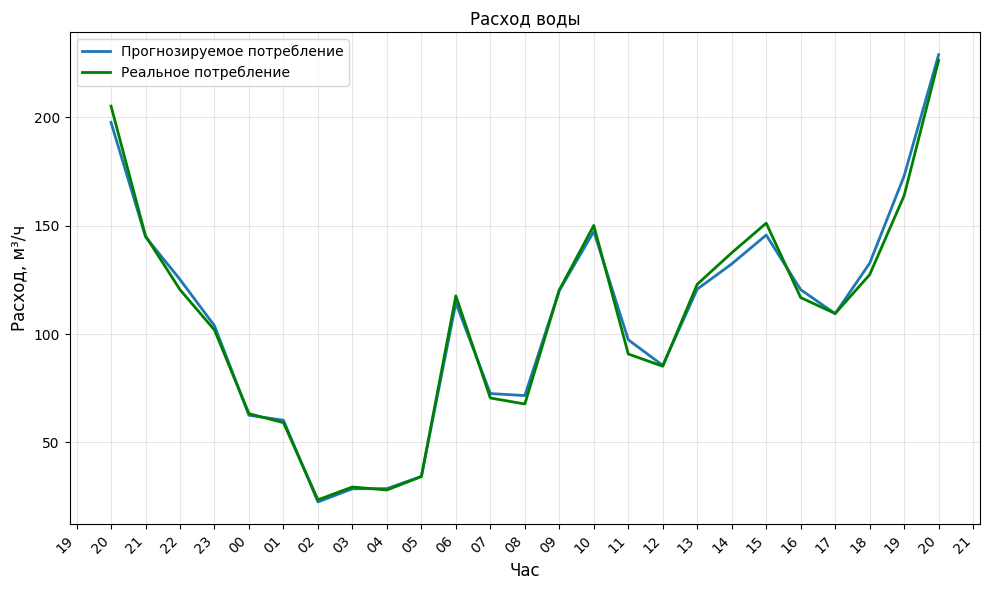

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Преобразуем строки в datetime объекты (сохраняем полную дату!)
timestamps = [datetime.strptime(ts, '%Y-%m-%d %H:%M:%S') 
              for ts in ctp_response['cunsumption_data']['timestamp']]

# Строим график по полным временным меткам
plt.figure(figsize=(10, 6))

plt.plot(timestamps, ctp_response['cunsumption_data']['predicted'], 
         linewidth=2, label='Прогнозируемое потребление')
plt.plot(timestamps, ctp_response['cunsumption_data']['real'], 
         color='green', linewidth=2, label='Реальное потребление')

# Настройка оси X: показываем часы, но сохраняем хронологию
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # каждый час

# Поворачиваем метки, чтобы не налезали
plt.xticks(rotation=45, ha='right')

plt.xlabel('Час', fontsize=12)
plt.ylabel('Расход, м³/ч', fontsize=12)
plt.title('Расход воды', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

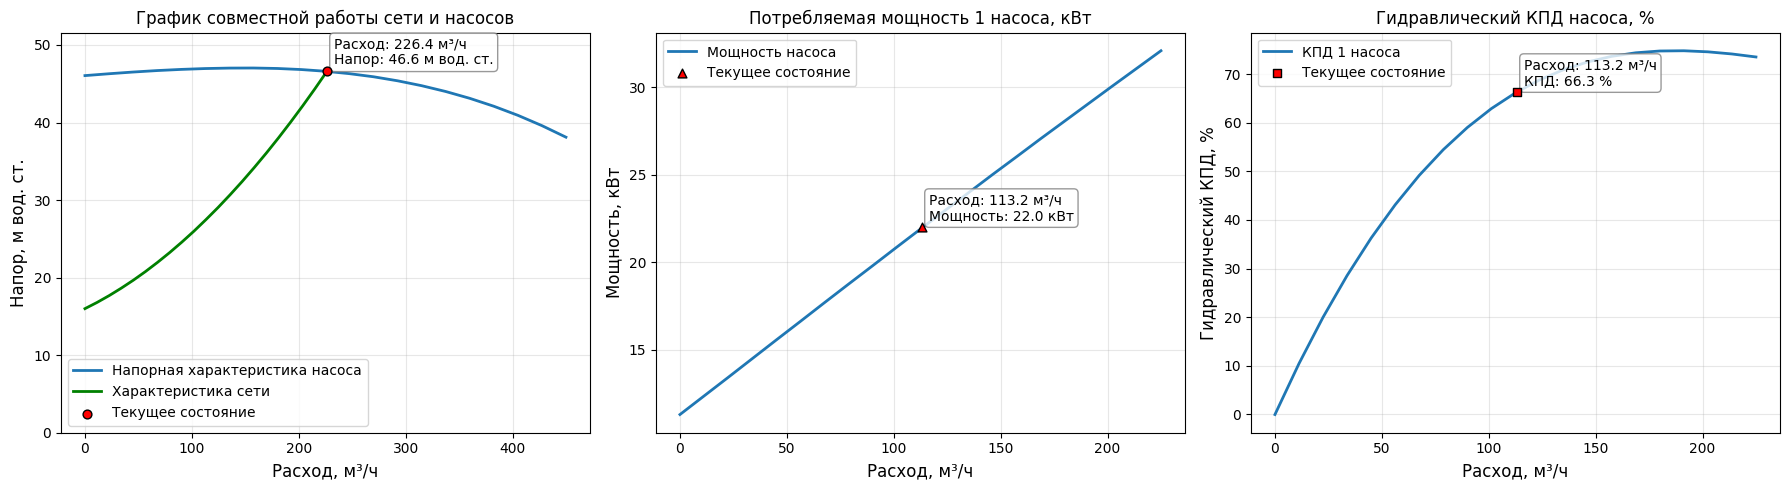

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # 3 графика в ряд, ширина увеличена

# График 1: Совместная работа сети и насосов
ax[0].plot(ctp_response['pressure_data']['pump_curve']['pump_consumption'], 
           ctp_response['pressure_data']['pump_curve']['pump_pressure'], linewidth=2, label='Напорная характеристика насоса')
ax[0].plot(ctp_response['pressure_data']['pipe_curve']['pipe_consumption'], 
           ctp_response['pressure_data']['pipe_curve']['pipe_pressure'], color='green', linewidth=2, label='Характеристика сети')

# Точка - круг
current_state_p1 = (ctp_response['pressure_data']['current_state']['consumption'], 
                    ctp_response['pressure_data']['current_state']['pressure'])
ax[0].scatter(current_state_p1[0], current_state_p1[1], color='red', s=40, zorder=5, marker='o', 
              edgecolors='black', linewidth=1, label='Текущее состояние')

# Подпись в две строки: расход и давление с единицами измерения
label_text_p1 = f"Расход: {current_state_p1[0]:.1f} м³/ч\nНапор: {current_state_p1[1]:.1f} м вод. ст."
ax[0].annotate(label_text_p1, 
               xy=(current_state_p1[0], current_state_p1[1]), 
               xytext=(5, 5), textcoords='offset points', fontsize=10, color='black', 
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='gray', alpha=0.8))

ax[0].set_xlabel('Расход, м³/ч', fontsize=12)
ax[0].set_ylabel('Напор, м вод. ст.', fontsize=12)
ax[0].set_title(f'График совместной работы сети и насосов', fontsize=12)
ax[0].set_ylim(0, max(ctp_response['pressure_data']['pipe_curve']['pipe_pressure'])+5)
ax[0].grid(True, alpha=0.3)
ax[0].legend()

# -----------------------------

# График 2: Потребляемая мощность
ax[1].plot(ctp_response['power_data']['pump_curve']['pump_consumption'], 
           ctp_response['power_data']['pump_curve']['pump_power'], linewidth=2, label='Мощность насоса')

# Треугольник
current_state_p2 = (ctp_response['power_data']['current_state']['consumption'], 
                    ctp_response['power_data']['current_state']['power'])
ax[1].scatter(current_state_p2[0], current_state_p2[1], color='red', s=40, zorder=5, marker='^', 
              edgecolors='black', linewidth=1, label='Текущее состояние')

# Подпись в две строки: расход и мощность
label_text_p2 = f"Расход: {current_state_p2[0]:.1f} м³/ч\nМощность: {current_state_p2[1]:.1f} кВт"
ax[1].annotate(label_text_p2, 
               xy=(current_state_p2[0], current_state_p2[1]), 
               xytext=(5, 5), textcoords='offset points', fontsize=10, color='black',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='gray', alpha=0.8))

ax[1].set_xlabel('Расход, м³/ч', fontsize=12)
ax[1].set_ylabel('Мощность, кВт', fontsize=12)
ax[1].set_title('Потребляемая мощность 1 насоса, кВт', fontsize=12)
ax[1].grid(True, alpha=0.3)
ax[1].legend()

# -----------------------------

# График 3: Гидравлический КПД
ax[2].plot(ctp_response['kpd_data']['pump_curve']['pump_consumption'], 
           ctp_response['kpd_data']['pump_curve']['pump_kpd'], linewidth=2, label='КПД 1 насоса')

# Квадрат
current_state_p3 = (ctp_response['kpd_data']['current_state']['consumption'], 
                    ctp_response['kpd_data']['current_state']['kpd'])
ax[2].scatter(current_state_p3[0], current_state_p3[1], color='red', s=40, zorder=5, marker='s', 
              edgecolors='black', linewidth=1, label='Текущее состояние')

# Подпись в две строки: расход и КПД
label_text_p3 = f"Расход: {current_state_p3[0]:.1f} м³/ч\nКПД: {current_state_p3[1]:.1f} %"
ax[2].annotate(label_text_p3, 
               xy=(current_state_p3[0], current_state_p3[1]), 
               xytext=(5, 5), textcoords='offset points', fontsize=10, color='black',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='gray', alpha=0.8))

ax[2].set_xlabel('Расход, м³/ч', fontsize=12)
ax[2].set_ylabel('Гидравлический КПД, %', fontsize=12)
ax[2].set_title('Гидравлический КПД насоса, %', fontsize=12)
ax[2].grid(True, alpha=0.3)
ax[2].legend()

plt.tight_layout()
plt.show()

## Примеры

In [21]:
import json
import pandas as pd
from collections import defaultdict
import pprint
import sqlite3

# Load the UNOMs from the consumption data
con = sqlite3.connect('data/hak2025.db')
unom_df = pd.read_sql_query("SELECT DISTINCT UNOM from synt_data", con)
valid_unoms = set(unom_df['UNOM'])

# Load and process the pipe lines data from the database
pipe_lines_df = pd.read_sql_query("SELECT input, output from pipe_lines", con)
con.close()

ctp_to_unom = defaultdict(list)
for index, row in pipe_lines_df.iterrows():
    start_id = row['input']
    end_id = row['output']
    
    if start_id is not None and end_id is not None:
        try:
            end_id_int = int(end_id)
            if end_id_int in valid_unoms:
                if end_id_int not in ctp_to_unom[start_id]:
                    ctp_to_unom[start_id].append(end_id_int)
        except (ValueError, TypeError):
            # Ignore entries where 'output' is not a valid integer
            continue

# Filter out CTPs with no valid UNOMs
filtered_ctp_to_unom = {ctp: unoms for ctp, unoms in ctp_to_unom.items() if unoms}

# Save the dictionary to a file
output_file_path = 'data/ctp_to_unom.json'
with open(output_file_path, 'w', encoding='utf-8') as f:
    json.dump(filtered_ctp_to_unom, f, ensure_ascii=False, indent=4)

print(f"Словарь сохранен в {output_file_path}")
pprint.pprint(filtered_ctp_to_unom)

Словарь сохранен в data/ctp_to_unom.json
{'04-07-0212/031': [15109, 24605, 15110, 15112, 15111, 15108],
 '04-07-0212/032': [15134, 15104],
 '04-07-0212/036': [15113, 24608, 15116, 15117, 15118],
 '04-07-0212/037': [24606, 24602, 24604, 24603],
 '04-07-0212/045': [15125, 15126, 15127, 15128, 15129],
 '04-07-0212/069': [24615, 15138, 24614, 15139, 15137, 15135],
 '04-07-0212/083': [24612, 24609],
 '04-07-0212/086': [65066, 82044],
 '04-07-0222/001': [31238, 22766, 51540, 31921],
 '04-07-0222/005': [65068],
 '04-07-0222/029': [30166, 30168, 30167, 30172, 30173, 30171, 30170, 30169],
 '04-07-0222/030': [30179, 30180, 30176, 30175, 30174, 30177, 30178],
 '04-07-0222/031': [30162, 22764, 22760, 30164, 30163, 30165],
 '04-07-0222/032': [65098,
                    22777,
                    24595,
                    15084,
                    15085,
                    15083,
                    15086,
                    24596,
                    24599,
                    24594,
          

In [34]:
import sqlite3
con = sqlite3.connect('data/hak2025.db')
unom_df = pd.read_sql_query("SELECT * from synt_data", con)
con.close()
print(unom_df['date'].max())
print(unom_df['date'].min())

2026-01-01 00:00:00
2025-01-01 01:00:00


In [29]:
import pandas as pd
import json
import time
import sqlite3

# --- Загрузка и предварительная обработка данных ---
# Предполагается, что предыдущая ячейка была выполнена для создания 'ctp_to_unom.json'
with open('data/ctp_to_unom.json', 'r', encoding='utf-8') as f:
    ctp_to_unom_map = json.load(f)

# Загрузка данных о расходе из БД
con = sqlite3.connect('data/hak2025.db')
# Проверяем, была ли уже проведена очистка столбцов
try:
    consumption_df = pd.read_sql_query("SELECT date, UNOM, consumption from synt_data", con)
    # Если успешно, значит работаем с уже очищенной таблицей
    consumption_df['timestamp'] = pd.to_datetime(consumption_df['date'])
    consumption_df.set_index('timestamp', inplace=True)
except sqlite3.OperationalError:
    # Иначе, загружаем исходную таблицу
    consumption_df = pd.read_sql_query("SELECT * from synt_data", con)
    consumption_df['timestamp'] = pd.to_datetime(consumption_df['date'].str[:10] + ' ' + consumption_df['time'])
    consumption_df.set_index('timestamp', inplace=True)

con.close()

consumption_df.sort_index(inplace=True)

# --- Определения функций ---
def get_ctp_consumption(timestamp_str, ctp_id, df, ctp_map):
    unoms_for_ctp = ctp_map.get(ctp_id)
    if not unoms_for_ctp:
        print(f"Внимание: ЦТП с ID '{ctp_id}' не найден.")
        return 0.0
    try:
        data_at_timestamp = df.loc[timestamp_str]
        # Используем 'consumption'
        consumption = data_at_timestamp[data_at_timestamp['UNOM'].isin(unoms_for_ctp)]['consumption'].sum()
        return consumption
    except KeyError:
        print(f"Внимание: Временная метка '{timestamp_str}' не найдена.")
        return 0.0

def get_unom_consumption(timestamp_str, unom_id, df):
    try:
        data_at_timestamp = df.loc[timestamp_str]
        # Используем 'consumption'
        consumption = data_at_timestamp[data_at_timestamp['UNOM'] == unom_id]['consumption'].sum()
        return consumption
    except KeyError:
        print(f"Внимание: Временная метка '{timestamp_str}' не найдена.")
        return 0.0

# --- Пример использования ---
example_timestamp = '2025-01-01 01:00:00'
example_ctp = next(iter(ctp_to_unom_map))

start_time = time.time()
total_consumption = get_ctp_consumption(example_timestamp, example_ctp, consumption_df, ctp_to_unom_map)
end_time = time.time()
print(f"Общий расход для ЦТП '{example_ctp}' в '{example_timestamp}': {total_consumption}")
print(f"Время выполнения для get_ctp_consumption: {end_time - start_time:.6f} секунд")

if ctp_to_unom_map.get(example_ctp):
    example_unom = ctp_to_unom_map[example_ctp][0]
    start_time = time.time()
    unom_consumption = get_unom_consumption(example_timestamp, example_unom, consumption_df)
    end_time = time.time()
    print(f"Расход для UNOM '{example_unom}' в '{example_timestamp}': {unom_consumption}")
    print(f"Время выполнения для get_unom_consumption: {end_time - start_time:.6f} секунд")

Общий расход для ЦТП '04-07-0212/031' в '2025-01-01 01:00:00': 121.5923273111226
Время выполнения для get_ctp_consumption: 0.061546 секунд
Расход для UNOM '15109' в '2025-01-01 01:00:00': 31.0584467731143
Время выполнения для get_unom_consumption: 0.000448 секунд


In [ ]:
from consumption_simulation import get_consumption_for_period_ctp, get_consumption_for_period_unom

# --- Примеры использования ---
# Эти переменные должны быть определены в предыдущих ячейках:
# ctp_to_unom_map, consumption_df
start_timestamp = '2025-01-01 01:00:00'
end_timestamp = '2025-01-01 05:00:00'
example_ctp = next(iter(ctp_to_unom_map))

ctp_results = get_consumption_for_period_ctp(example_ctp, start_timestamp, end_timestamp, consumption_df, ctp_to_unom_map)
print(f"--- Расход для ЦТП '{example_ctp}' с {start_timestamp} по {end_timestamp} ---")
print(ctp_results)

if ctp_to_unom_map.get(example_ctp):
    example_unom = ctp_to_unom_map[example_ctp][0]
    unom_results = get_consumption_for_period_unom(example_unom, start_timestamp, end_timestamp, consumption_df)
    print(f"\n--- Расход для UNOM '{example_unom}' с {start_timestamp} по {end_timestamp} ---")
    print(unom_results)

--- Расход для ЦТП '04-07-0212/031' с 2025-01-01 01:00:00 по 2025-01-01 05:00:00 ---
                        прогноз    реальный
timestamp                                  
2025-01-01 01:00:00  121.592327  122.648944
2025-01-01 02:00:00   49.742316   49.907878
2025-01-01 03:00:00   55.269240   55.494015
2025-01-01 04:00:00   55.269240   55.930409
2025-01-01 05:00:00   71.850012   71.738156

--- Расход для UNOM '15109' с 2025-01-01 01:00:00 по 2025-01-01 05:00:00 ---
                       прогноз   реальный
timestamp                                
2025-01-01 01:00:00  31.058447  32.673999
2025-01-01 02:00:00  12.705728  12.525429
2025-01-01 03:00:00  14.117476  14.911736
2025-01-01 04:00:00  14.117476  14.900653
2025-01-01 05:00:00  18.352719  18.371404


In [31]:
import sqlite3
import pandas as pd

db_path = 'data/hak2025.db'
table_name = 'synt_data'

# --- 1. Подключение к БД и чтение данных ---
con = sqlite3.connect(db_path)
print(f"Чтение данных из таблицы '{table_name}'...")
df = pd.read_sql_query(f"SELECT * FROM {table_name}", con)
print("Данные успешно загружены.")

# --- 2. Исправление данных ---
print("Исправление столбца 'date' с сохранением остальных столбцов...")
# Перезаписываем столбец 'date', объединяя исходные 'date' и 'time'
df['date'] = pd.to_datetime(df['date'].str[:10] + ' ' + df['time'])
# Остальные столбцы ('time', 'weekday', 'ctp', и т.д.) не удаляются.
print("Столбец 'date' успешно обновлен.")

# --- 3. Запись исправленных данных обратно в БД ---
print(f"Запись обновленных данных обратно в таблицу '{table_name}'...")
# 'replace' удалит старую таблицу и создаст новую с исправленными данными
df.to_sql(table_name, con, if_exists='replace', index=False)
print("Данные успешно обновлены в базе данных.")

# --- 4. Проверка результата ---
print("\nПроверка: первые 5 строк обновленной таблицы:")
df_check = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5", con)
print(df_check)

con.close()



Чтение данных из таблицы 'synt_data'...
Данные успешно загружены.
Исправление столбца 'date' с сохранением остальных столбцов...


KeyError: 'time'

In [5]:
import pandas as pd

pd.read_csv("data/melted_all_consumption_2025.csv")

,Unnamed: 0,Дата,Время,День_недели,UNOM,Расход
0,0,2025-01-01,01:00,Среда,8423,7.647921
1,1,2025-01-01,01:00,Среда,8423,7.905601
2,2,2025-01-01,01:00,Среда,8423,22.782879
3,3,2025-01-01,01:00,Среда,8423,14.020497
4,4,2025-01-01,01:00,Среда,8423,13.927794
...,...,...,...,...,...,...
1769515,1769515,2026-01-01,00:00,Среда,15091,23.078863
1769516,1769516,2026-01-01,00:00,Среда,15091,17.983409
1769517,1769517,2026-01-01,00:00,Среда,15091,13.710025
1769518,1769518,2026-01-01,00:00,Среда,15091,16.070079


In [13]:
import json
import pandas as pd
from collections import defaultdict
import pprint

# Load the UNOMs from the consumption data
consumption_df = pd.read_csv('data/melted_all_consumption_2025.csv')
valid_unoms = set(consumption_df['UNOM'].unique())
print(len(valid_unoms))


# Load and process the GeoJSON file
file_path = 'data/Трубы_v2.geojson'
ctp_to_unom = defaultdict(list)

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

for feature in data['features']:
    properties = feature['properties']
    start_id = properties.get('Начало')
    end_id = properties.get('Конец')
    
    if start_id is not None and end_id is not None:
        try:
            end_id_int = int(end_id)
            if end_id_int in valid_unoms:
                if end_id_int not in ctp_to_unom[start_id]:
                    ctp_to_unom[start_id].append(end_id_int)
        except (ValueError, TypeError):
            # Ignore entries where 'Конец' is not a valid integer
            continue

# Filter out CTPs with no valid UNOMs
filtered_ctp_to_unom = {ctp: unoms for ctp, unoms in ctp_to_unom.items() if unoms}

pprint.pprint(filtered_ctp_to_unom)

# Save the dictionary to a file
output_file_path = 'data/ctp_to_unom.json'
with open(output_file_path, 'w', encoding='utf-8') as f:
    json.dump(filtered_ctp_to_unom, f, ensure_ascii=False, indent=4)

output_file_path


29
{'04-07-0222/032': [15084, 15085, 15083, 15086],
 '04-07-0222/035': [15089],
 '04-07-0222/046': [15088, 15091, 15090],
 '04-07-0222/057': [15087],
 '04-07-0223/036': [8423, 8427],
 '04-07-0615/009': [12178, 12177, 12179],
 '04-07-0615/010': [12174, 13634, 13635],
 '04-07-0615/012': [13639, 13637, 13638],
 '04-07-0615/015': [12183, 12184, 12182],
 '04-07-0615/016': [13643, 13642, 13644],
 '04-07-0615/017': [13641],
 '04-07-0615/018': [12176],
 '04-07-0615/019': [12180]}


'data/ctp_to_unom.json'

In [19]:
import pandas as pd
import json
import time

# --- Data Loading and Preprocessing ---
# Load the mapping from CTP to UNOMs
with open('data/ctp_to_unom.json', 'r', encoding='utf-8') as f:
    ctp_to_unom_map = json.load(f)

# Load consumption data
consumption_df = pd.read_csv('data/melted_all_consumption_2025.csv')

# Combine 'Дата' and 'Время' into a single datetime column and set it as the index
# This is a one-time operation to make lookups faster
consumption_df['timestamp'] = pd.to_datetime(consumption_df['Дата'] + ' ' + consumption_df['Время'])
consumption_df.set_index('timestamp', inplace=True)


# --- Function Definitions ---
def get_ctp_consumption(timestamp_str, ctp_id, df, ctp_map):
    """
    Calculates the total water consumption for a given CTP at a specific timestamp.

    Args:
        timestamp_str (str): The timestamp in 'YYYY-MM-DD HH:MM:SS' or similar format.
        ctp_id (str): The ID of the CTP.
        df (pd.DataFrame): The consumption dataframe with a datetime index.
        ctp_map (dict): A dictionary mapping CTP IDs to lists of UNOMs.

    Returns:
        float: The total consumption for the CTP at the given timestamp, or 0 if not found.
    """
    unoms_for_ctp = ctp_map.get(ctp_id)
    
    if not unoms_for_ctp:
        print(f"Warning: CTP ID '{ctp_id}' not found in the map.")
        return 0.0

    try:
        data_at_timestamp = df.loc[timestamp_str]
        consumption = data_at_timestamp[data_at_timestamp['UNOM'].isin(unoms_for_ctp)]['Расход'].sum()
        return consumption
    except KeyError:
        print(f"Warning: Timestamp '{timestamp_str}' not found in the data.")
        return 0.0
    except Exception as e:
        print(f"An error occurred: {e}")
        return 0.0

def get_unom_consumption(timestamp_str, unom_id, df):
    """
    Calculates the water consumption for a given UNOM at a specific timestamp.

    Args:
        timestamp_str (str): The timestamp in 'YYYY-MM-DD HH:MM:SS' or similar format.
        unom_id (int): The ID of the UNOM.
        df (pd.DataFrame): The consumption dataframe with a datetime index.

    Returns:
        float: The total consumption for the UNOM at the given timestamp, or 0 if not found.
    """
    try:
        data_at_timestamp = df.loc[timestamp_str]
        consumption = data_at_timestamp[data_at_timestamp['UNOM'] == unom_id]['Расход'].sum()
        
        if consumption == 0 and not data_at_timestamp[data_at_timestamp['UNOM'] == unom_id].empty:
             print(f"Warning: UNOM ID '{unom_id}' found, but consumption is zero at '{timestamp_str}'.")
        elif data_at_timestamp[data_at_timestamp['UNOM'] == unom_id].empty:
             print(f"Warning: UNOM ID '{unom_id}' not found for timestamp '{timestamp_str}'.")

        return consumption
    except KeyError:
        print(f"Warning: Timestamp '{timestamp_str}' not found in the data.")
        return 0.0
    except Exception as e:
        print(f"An error occurred: {e}")
        return 0.0

# --- Example Usage for CTP ---
example_timestamp = '2025-01-01 01:00:00'
example_ctp = next(iter(ctp_to_unom_map))

start_time = time.time()
total_consumption = get_ctp_consumption(example_timestamp, example_ctp, consumption_df, ctp_to_unom_map)
end_time = time.time()

print(f"Total consumption for CTP '{example_ctp}' at '{example_timestamp}': {total_consumption}")
print(f"Execution time for get_ctp_consumption: {end_time - start_time:.6f} seconds")


# --- Example Usage for UNOM ---
if ctp_to_unom_map.get(example_ctp):
    example_unom = ctp_to_unom_map[example_ctp][0]
    
    start_time = time.time()
    unom_consumption = get_unom_consumption(example_timestamp, example_unom, consumption_df)
    end_time = time.time()
    
    print(f"Consumption for UNOM '{example_unom}' at '{example_timestamp}': {unom_consumption}")
    print(f"Execution time for get_unom_consumption: {end_time - start_time:.6f} seconds")



Total consumption for CTP '04-07-0222/032' at '2025-01-01 01:00:00': 446.0991039695924
Execution time for get_ctp_consumption: 0.063143 seconds
Consumption for UNOM '15084' at '2025-01-01 01:00:00': 83.04867606868443
Execution time for get_unom_consumption: 0.001512 seconds


In [ ]:
import numpy as np

def simulate_real_consumption(df, noise_level=0.05):
    """
    Simulates real consumption data by adding Gaussian noise to the 'Расход' column.

    Args:
        df (pd.DataFrame): The input dataframe with a 'Расход' column.
        noise_level (float): The fraction of the standard deviation to use for the noise scale.

    Returns:
        pd.DataFrame: A new dataframe with added noise in the 'Расход' column.
    """
    # Create a copy to avoid modifying the original dataframe
    df_simulated = df.copy()
    
    # Calculate the scale of the noise based on the standard deviation of the consumption
    noise_scale = df_simulated['Расход'].std() * noise_level
    
    # Generate Gaussian noise
    noise = np.random.normal(0, noise_scale, df_simulated.shape[0])
    
    # Add noise to the consumption data
    df_simulated['Расход'] += noise
    
    # Ensure consumption is not negative
    df_simulated['Расход'] = df_simulated['Расход'].clip(lower=0)
    
    return df_simulated

# --- Example Usage ---
# Create a new dataframe with simulated data
simulated_consumption_df = simulate_real_consumption(consumption_df)

# --- Comparison ---
print("Comparison of Original vs. Simulated Data (first 5 rows):")
comparison_df = pd.DataFrame({
    'Прогназируемый Расход': consumption_df.head()['Расход'],
    'Реальный Расход': simulated_consumption_df.head()['Расход']
})
print(comparison_df)

# You can now use 'simulated_consumption_df' with the previously defined functions
example_timestamp = '2025-01-01 01:00:00'
example_ctp = next(iter(ctp_to_unom_map))

print("\n--- Using simulated data with previous functions ---")
total_consumption_simulated = get_ctp_consumption(example_timestamp, example_ctp, simulated_consumption_df, ctp_to_unom_map)
print(f"Total SIMULATED consumption for CTP '{example_ctp}' at '{example_timestamp}': {total_consumption_simulated}")

Comparison of Original vs. Simulated Data (first 5 rows):
                     Прогназируемый Расход  Реальный Расход
timestamp                                                  
2025-01-01 01:00:00               7.647921         5.800945
2025-01-01 01:00:00               7.905601         7.986867
2025-01-01 01:00:00              22.782879        20.229392
2025-01-01 01:00:00              14.020497        15.171435
2025-01-01 01:00:00              13.927794        12.568367

--- Using simulated data with previous functions ---
Total SIMULATED consumption for CTP '04-07-0222/032' at '2025-01-01 01:00:00': 456.5314860969836


In [62]:
import requests
import json

# Make sure your Flask app is running before executing this cell.
# You can run it from your terminal with: python backend/app.py

# URL of the endpoint
url = 'http://127.0.0.1:5001/mcd_data'

# Parameters for the request
# Using an example UNOM and timestamp from the notebook exploration
params = {
    'unom': 22815,
    'timestamp': '2025-09-07T19:00:00'
}

print(f"Requesting data from: {url}")
print(f"With parameters: {params}")

try:
    # Make the GET request
    response = requests.get(url, params=params)

    # Print the status code
    print(f"Status Code: {response.status_code}")

    # Check if the request was successful
    if response.status_code == 200:
        # Pretty print the JSON response
        print("Response JSON:")
        # Use ensure_ascii=False to correctly display Russian characters if any
        print(json.dumps(response.json(), indent=4, ensure_ascii=False))
    else:
        print("Error response from server:")
        print(response.text)

except requests.exceptions.ConnectionError as e:
    print(f"\nConnection Error: Failed to establish a connection to {url}.")
    print("Please ensure that the Flask server ('backend/app.py') is running in a separate terminal.")


Requesting data from: http://127.0.0.1:5001/mcd_data
With parameters: {'unom': 22815, 'timestamp': '2025-09-07T19:00:00'}
Status Code: 200
Response JSON:
{
    "predicted": [
        27.98394223539722,
        38.52505958780257,
        27.97015604264892,
        24.00898295797386,
        19.735908717233457,
        11.993863389245876,
        11.722841986634789,
        4.448917104936341,
        5.399015925931428,
        5.483816273418531,
        6.657629580927298,
        21.854599771200807,
        13.622933577435484,
        13.869695712564912,
        23.364293370506537,
        27.580600969830098,
        18.820335585145223,
        16.16883329339059,
        22.987212249601303,
        24.716224445822903,
        28.35925467059958,
        22.741725881961752,
        20.811070903527224,
        25.571996103234184,
        32.07234229865828
    ],
    "real": [
        28.331442739531482,
        38.391893576765426,
        28.42305477959171,
        24.9231429046485,
       

In [7]:
import requests
import json

# Make sure your Flask app is running before executing this cell.

# URL of the ctp_data endpoint
ctp_url = 'http://127.0.0.1:5001/ctp_data'

# Parameters for the request
# Using an example CTP ID and the same timestamp
ctp_params = {
    'ctp_id': '04-07-0222/059',  # Example CTP ID from notebook
    'timestamp': '2025-09-05T05:00:00'
}

print(f"Requesting data from: {ctp_url}")
print(f"With parameters: {ctp_params}")

try:
    # Make the GET request
    ctp_response = requests.get(ctp_url, params=ctp_params)

    # Print the status code
    print(f"Status Code: {ctp_response.status_code}")

    # Check if the request was successful
    if ctp_response.status_code == 200:
        # Pretty print the JSON response
        print("Response JSON:")
        print(json.dumps(ctp_response.json(), indent=4, ensure_ascii=False))
    else:
        print("Error response from server:")
        print(ctp_response.text)

except requests.exceptions.ConnectionError as e:
    print(f"\nConnection Error: Failed to establish a connection to {ctp_url}.")
    print("Please ensure that the Flask server ('backend/app.py') is running.")

Requesting data from: http://127.0.0.1:5001/ctp_data
With parameters: {'ctp_id': '04-07-0222/059', 'timestamp': '2025-09-05T05:00:00'}

Connection Error: Failed to establish a connection to http://127.0.0.1:5001/ctp_data.
Please ensure that the Flask server ('backend/app.py') is running.


In [3]:
import requests
import json

# Make sure your Flask app is running before executing this cell.

# URL of the alerts endpoint
alerts_url = 'http://127.0.0.1:5001/alerts'

params = {'timestamp': '2025-09-07T11:00:00'}
try:
    response = requests.get(alerts_url, params=params)
    print(f"Status Code: {response.status_code}")
    if response.status_code == 200:
        print("Response JSON:")
        print(json.dumps(response.json(), indent=4, ensure_ascii=False))
    else:
        print("Error:", response.text)
except requests.exceptions.ConnectionError as e:
    print(f"Connection Error: {e}")

Connection Error: HTTPConnectionPool(host='127.0.0.1', port=5001): Max retries exceeded with url: /alerts?timestamp=2025-09-07T11%3A00%3A00 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x106207d90>: Failed to establish a new connection: [Errno 61] Connection refused'))
